In [46]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report,mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

input_file = "train.csv"
train = pd.read_csv(input_file, header=0)
label = ['SalePrice']
nominal = ['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','GarageType','MiscFeature','SaleType','SaleCondition']

ordinal = ['LotShape', 'Utilities','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive','PoolQC','Fence']
continuous = ['Id','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
discrete = ['YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','MoSold','YrSold']

# Cambio NA por NO para que no me los tome como missing
train[ordinal] = train[ordinal].fillna('No')
train[nominal] = train[nominal].fillna('No')
train.isnull().sum().sort_values(ascending=False).head(5)


LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
KitchenAbvGr      0
dtype: int64

<ipython-input-47-9469c92b69e7>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train[relevant_columns].corr(method='pearson')


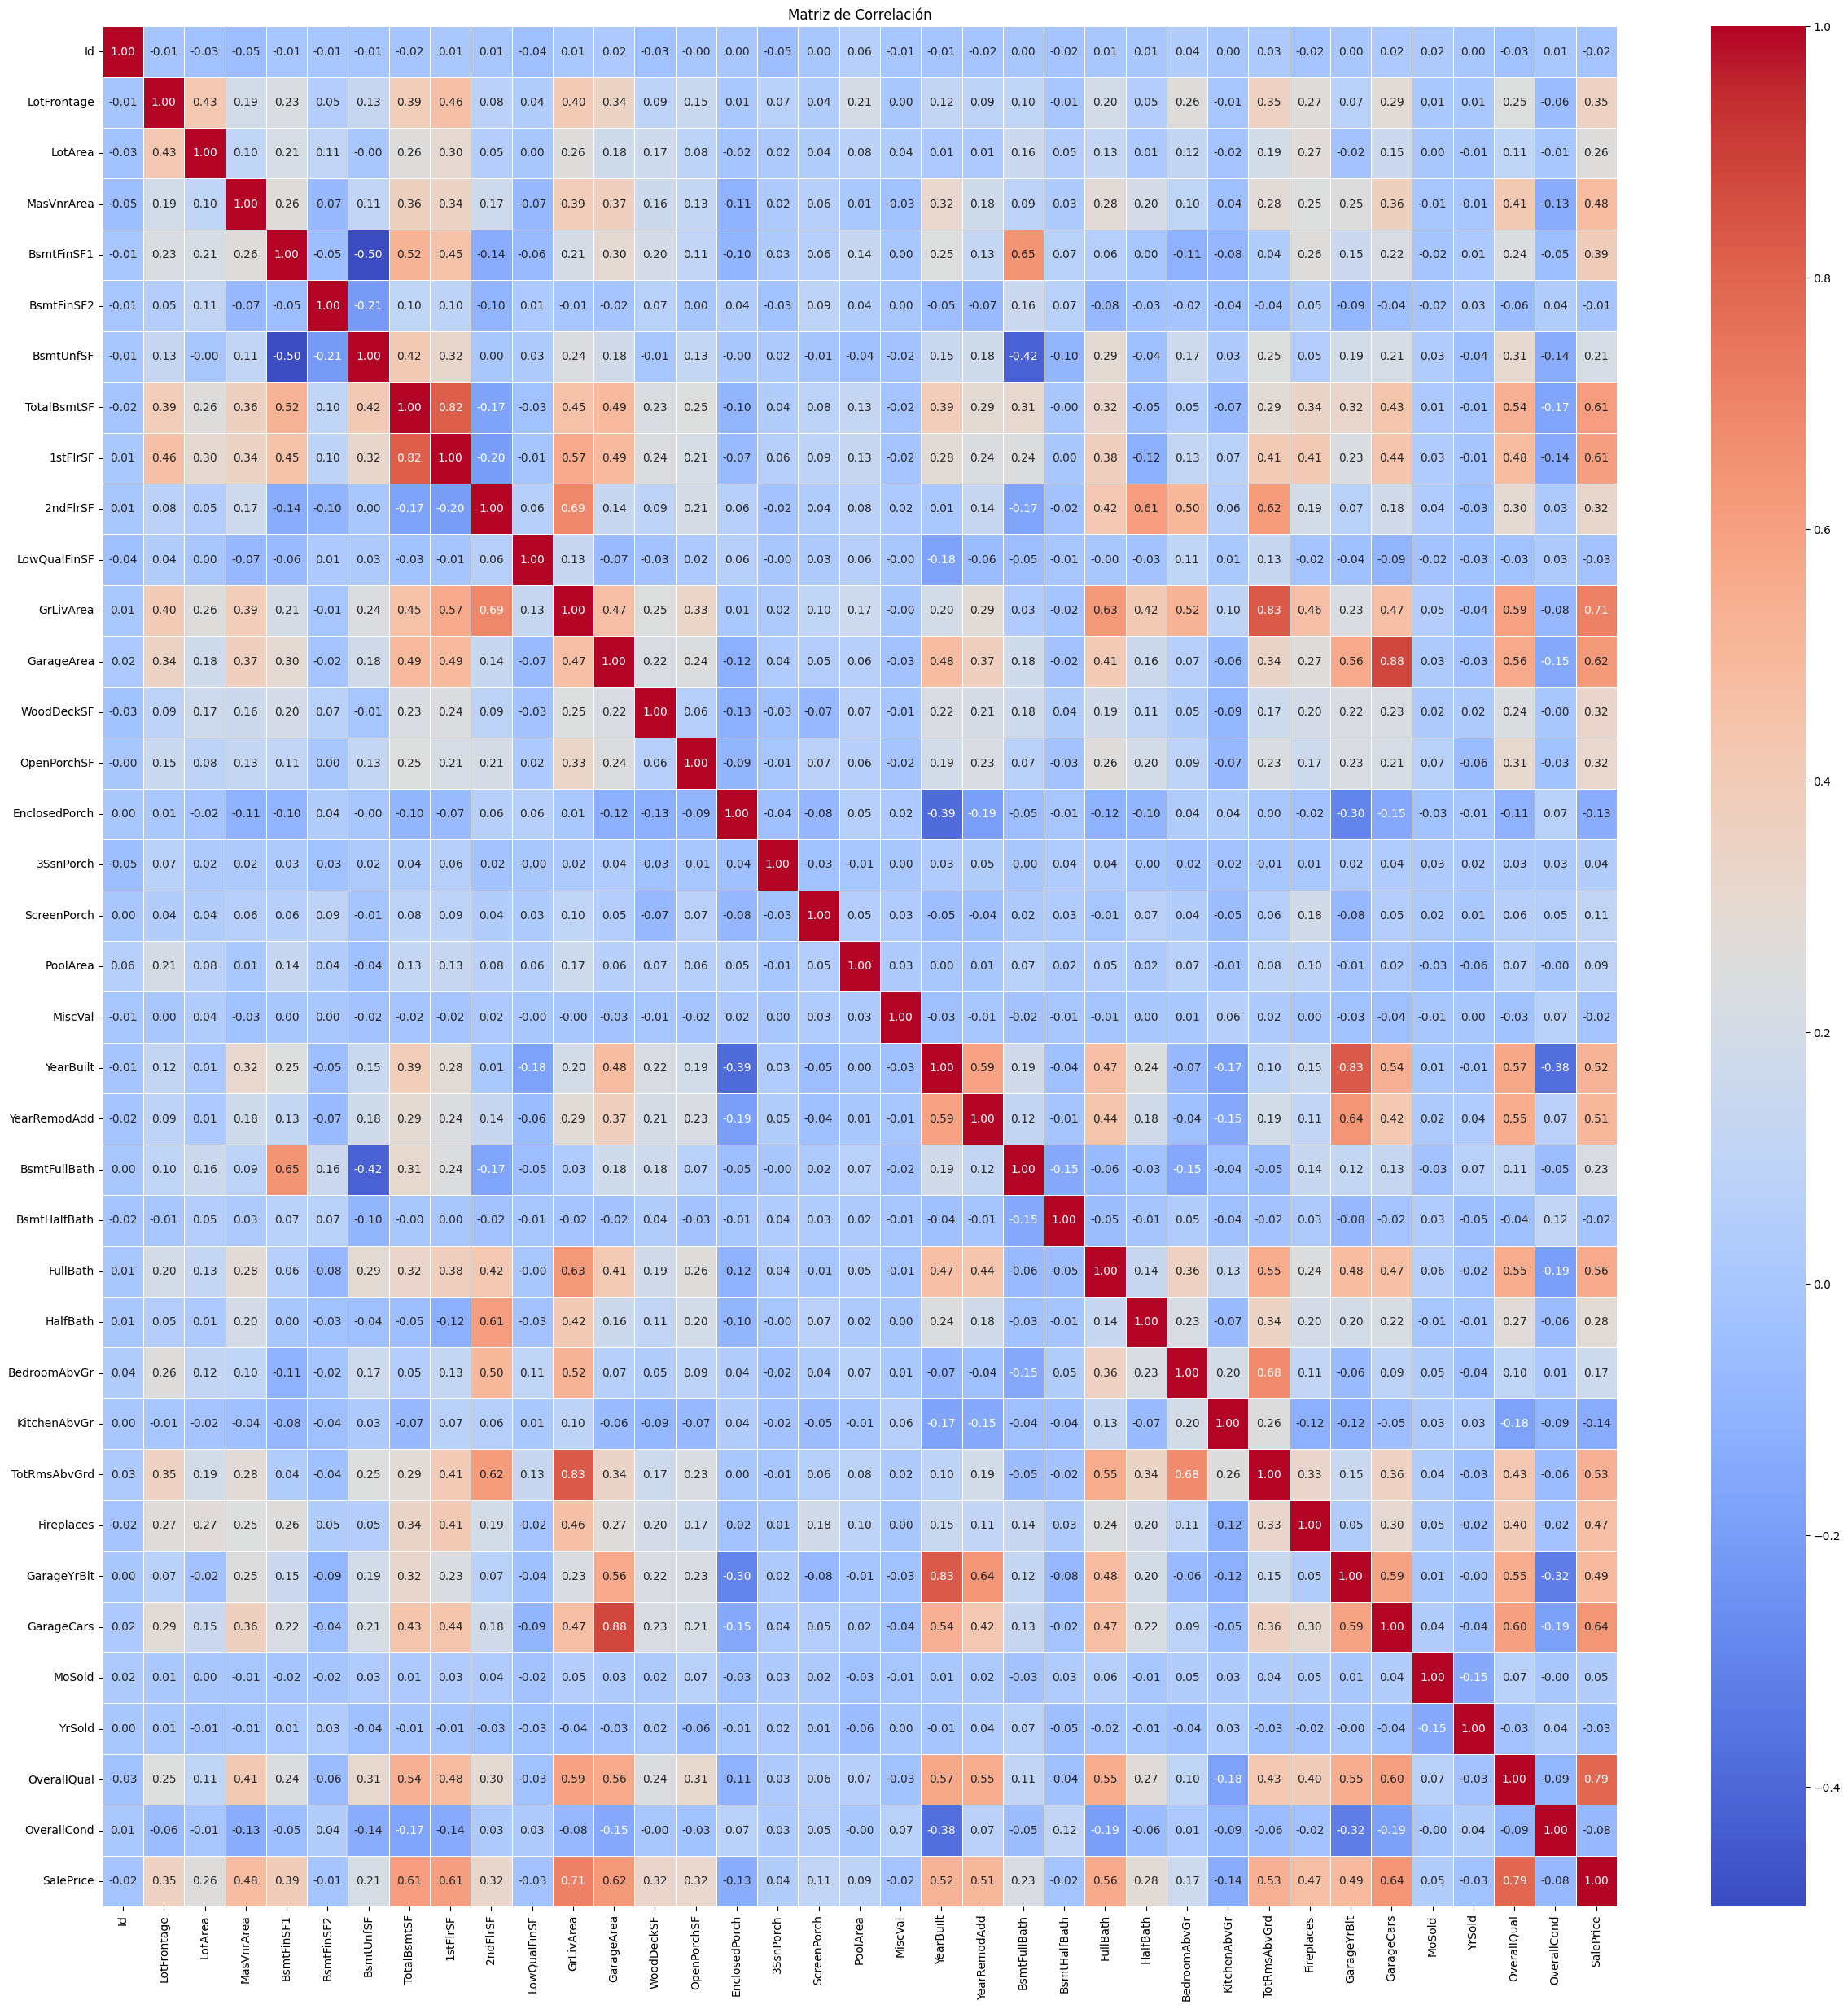

In [47]:
# Filtrar las columnas relevantes
relevant_columns = continuous + discrete + ordinal + label

# Calcular la matriz de correlación de Pearson
correlation_matrix = train[relevant_columns].corr(method='pearson')

plt.figure(figsize=(30, 30))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")

# Mostrar el mapa de calor
plt.show()

In [48]:
# Filtrar las correlaciones con SalePrice que son mayores que 0.5 o menores que -0.5
relevant_correlations = correlation_matrix['SalePrice'][(correlation_matrix['SalePrice'] > 0.5) | (correlation_matrix['SalePrice'] < -0.5)]

# Ordenar las correlaciones de forma descendente
relevant_correlations = relevant_correlations.sort_values(ascending=False)

# Mostrar las correlaciones relevantes
print(relevant_correlations)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [49]:
filtered_attributes = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']
train[filtered_attributes].corr()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855
YearRemodAdd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000


In [50]:
filtered_attributes.remove('GarageArea')
filtered_attributes.remove('TotalBsmtSF')
filtered_attributes.remove('GrLivArea')
filtered_attributes

['OverallQual',
 'GarageCars',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

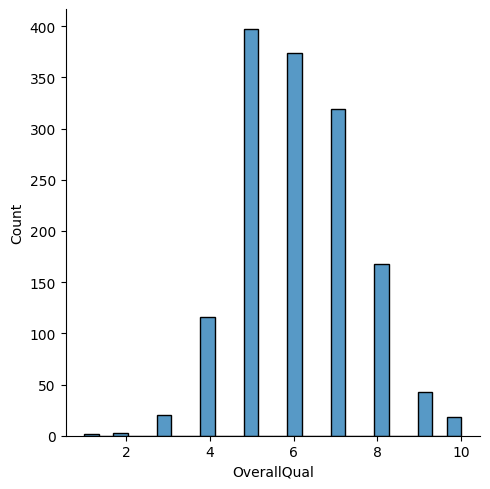

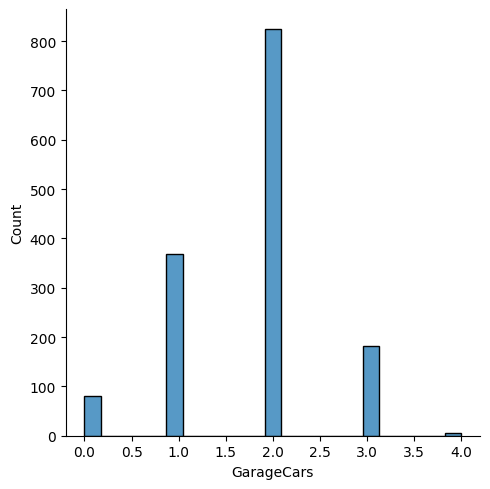

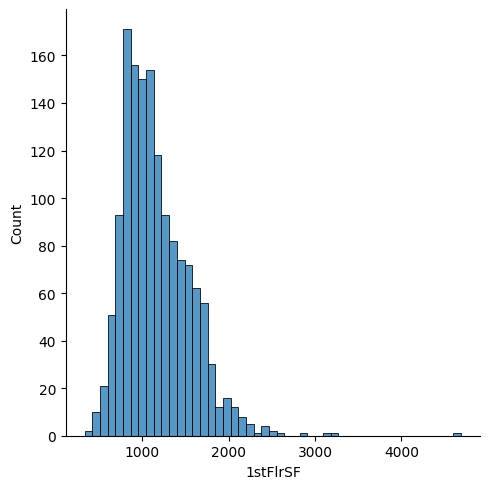

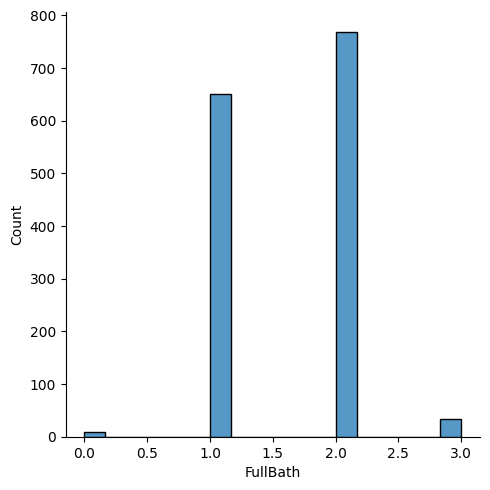

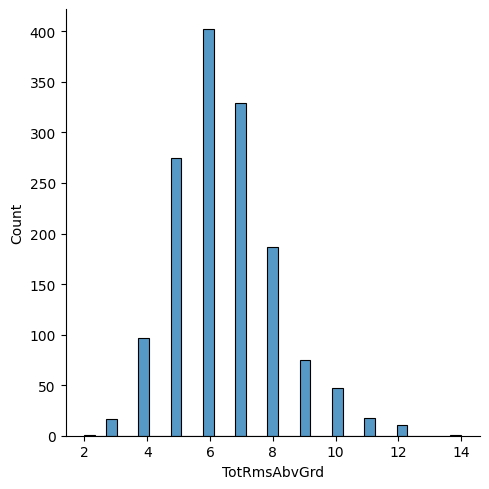

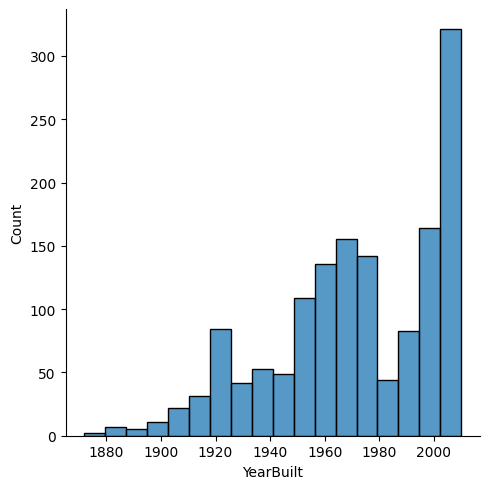

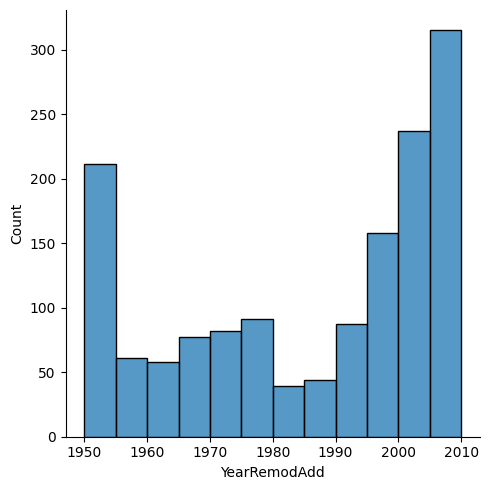

In [51]:
for attribute in filtered_attributes:
  sns.displot(train[attribute])
  plt.show()

RMSE: 40425.2781006158
R^2: 0.7658095225576117


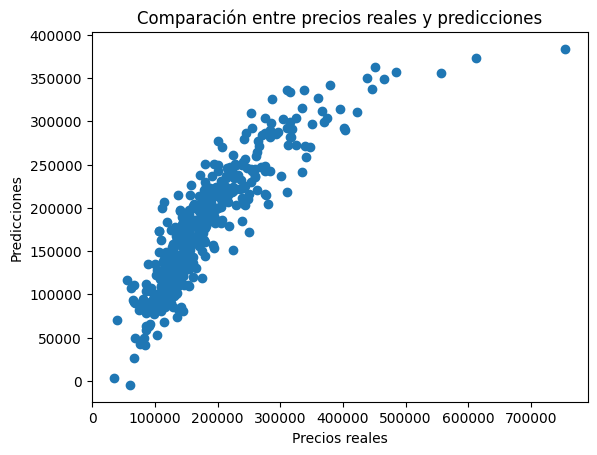

In [52]:
X_train, X_test, y_train, y_test = train_test_split(train[filtered_attributes], train['SalePrice'], test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
plt.scatter(y_test, y_pred)
plt.xlabel('Precios reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre precios reales y predicciones')
plt.show()
